# Portfolio optimization using Relative Value Analyis (GE vs. its competitors)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
import pandas_datareader.data as web
from datetime import datetime as dt
import statsmodels.api as sm

In [104]:
import yfinance as yf

In [105]:
ge = yf.download('GE', start= '2019-01-01', end ='2020-12-31')
boeing = yf.download('BA', start= '2019-01-01', end ='2020-12-31')
lockheed = yf.download('LMT', start= '2019-01-01', end ='2020-12-31')
ratheontech = yf.download('RTX', start= '2019-01-01', end ='2020-12-31')
leguard = yf.download('LGRVF', start= '2019-01-01', end ='2020-12-31')
honeywell = yf.download('HON', start= '2019-01-01', end ='2020-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
[ge.head(), boeing.head (), lockheed.head(), ratheontech.head(),leguard.head(),honeywell.head()]

[                Open      High       Low     Close  Adj Close     Volume
 Date                                                                    
 2019-01-02  7.173077  7.865385  7.125000  7.740385   7.670503  134528200
 2019-01-03  7.711538  7.884615  7.480769  7.750000   7.680031  127866900
 2019-01-04  7.875000  7.942307  7.673077  7.913462   7.842017  124887100
 2019-01-07  8.221154  8.451923  7.971154  8.403846   8.327974  186871700
 2019-01-08  8.567307  8.692307  8.192307  8.230769   8.156459  152859600,
                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2019-01-02  316.190002  323.950012  313.709991  323.809998  314.645142   
 2019-01-03  319.489990  319.739990  309.399994  310.899994  302.100555   
 2019-01-04  316.690002  328.440002  316.079987  327.079987  317.822601   
 2019-01-07  330.519989  330.690002  323.350006  328.109985  318.823395   
 2019-01-08  334.109985  341.25

In [106]:
# Saving individual stock data in csv files (to be determined if necessary/not currently created)
ge.to_csv('Data/ge.csv', index= False)
boeing.to_csv('Data/boeing.csv', index = False)
lockheed.to_csv('Data/lockheed.csv', index = False)
ratheontech.to_csv('Data/ratheontech.csv', index = False)
leguard.to_csv('Data/leguard.csv', index = False)
howell.to_csv('Data/howell.csv', index = False)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/ge.csv'

In [107]:
objects = [ge, boeing,lockheed,ratheontech,leguard,honeywell]
for obj in objects:
    obj.reset_index(inplace = True)

In [108]:
date = ge['Date']

In [109]:
objects = [ge, boeing,lockheed,ratheontech,leguard,honeywell]
all_data = pd.DataFrame(date)
for obj in objects:
    all_data = pd.merge(left = all_data, right = obj, how = 'inner', on = 'Date')

In [110]:
cols = all_data.columns
cols

Index(['Date', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Adj Close_x',
       'Volume_x', 'Open_y', 'High_y', 'Low_y', 'Close_y', 'Adj Close_y',
       'Volume_y', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Adj Close_x',
       'Volume_x', 'Open_y', 'High_y', 'Low_y', 'Close_y', 'Adj Close_y',
       'Volume_y', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Adj Close_x',
       'Volume_x', 'Open_y', 'High_y', 'Low_y', 'Close_y', 'Adj Close_y',
       'Volume_y'],
      dtype='object')

In [83]:
new_cols= ['Date','Open_ge', 'High_ge', 'Low_ge', 'Close_ge', 'Adj_Close_ge', 'Volume_ge',
           'Open_boeing', 'High_boeing', 'Low_boeing', 'Close_boeing', 'Adj_Close_boeing', 'Volume_boeing',
           'Open_lockheed', 'High_lockheed', 'Low_lockheed', 'Close_lockheed', 'Adj_Close_lockheed', 'Volume_lockheed',
           'Open_ratheontech', 'High_ratheontech', 'Low_ratheontech', 'Close_ratheontech', 'Adj_Close_ratheontech', 'Volume_ratheontech',
           'Open_leguard', 'High_leguard', 'Low_leguard', 'Close_leguard', 'Adj_Close_leguard', 'Volume_leguard',
           'Open_honeywell', 'High_honeywell', 'Low_honeywell', 'Close_honeywell', 'Adj_Close_honeywell', 'Volume_honeywell']

In [111]:
all_data.head()

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,...,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2019-01-02,7.173077,7.865385,7.125000,7.740385,7.670503,134528200,316.190002,323.950012,313.709991,...,55.450001,55.450001,53.040386,0,130.190002,132.089996,129.500000,131.830002,126.255783,2756000
1,2019-01-03,7.711538,7.884615,7.480769,7.750000,7.680031,127866900,319.489990,319.739990,309.399994,...,55.450001,55.450001,53.040386,0,132.100006,132.979996,129.070007,130.070007,124.570198,3184000
2,2019-01-04,7.875000,7.942307,7.673077,7.913462,7.842017,124887100,316.690002,328.440002,316.079987,...,55.450001,55.450001,53.040386,0,132.619995,135.039993,132.050003,134.619995,128.927795,3583600
3,2019-01-07,8.221154,8.451923,7.971154,8.403846,8.327974,186871700,330.519989,330.690002,323.350006,...,55.450001,55.450001,53.040386,0,134.339996,136.000000,133.149994,135.369995,129.646088,2944600
4,2019-01-08,8.567307,8.692307,8.192307,8.230769,8.156459,152859600,334.109985,341.250000,332.649994,...,55.450001,55.450001,53.040386,0,136.059998,136.880005,134.320007,135.089996,129.377899,2636100


In [112]:
all_data.shape

(504, 37)

In [113]:
# Importing datetime for setting start and end date of the stock market dataset

today = dt.today().strftime('%Y-%m-%d')
start = dt(2017,1,1).strftime('%Y-%m-%d')
stocks = web.DataReader(['GE',],
               data_source='yahoo',
               start=start,
               end=today)

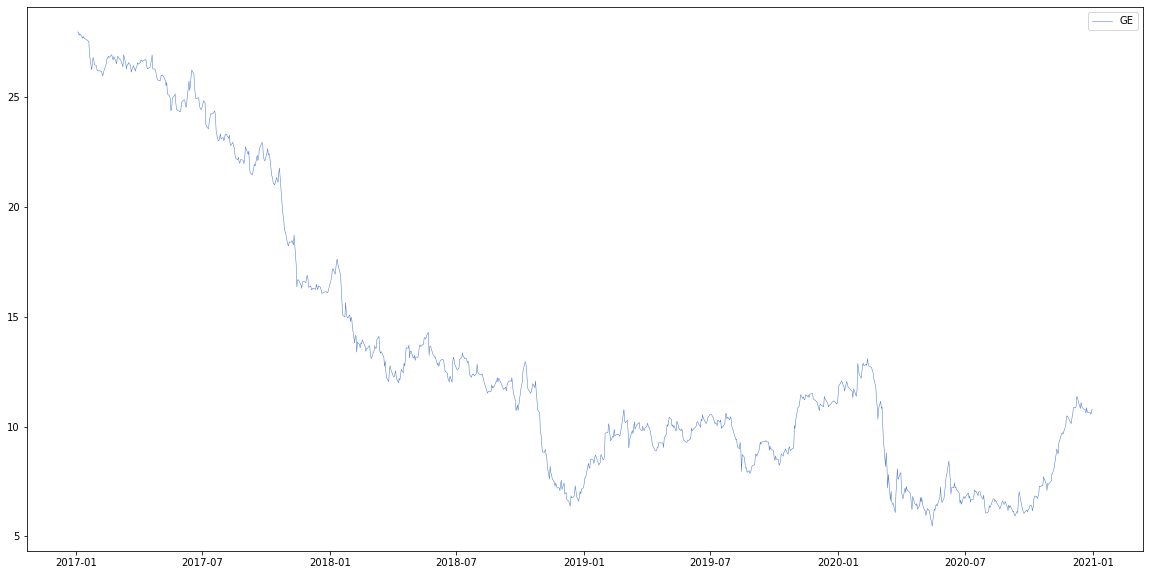

In [114]:
# Plotting Historical Closing price for General Electric (GE)

def plotStocks(stocks):
    """Stock plotting function. The portfolio is drawn thicker"""
    lw = 0.5
    names = stocks.columns.values
    plt.figure(figsize=(20,10))
    for name in names:
        price = stocks[name]
        if name == 'portfolio':
            lw = 4
        else:
            lw = 0.5
        plt.plot(stocks[name],label = name,linewidth = lw)
        
    plt.legend()

closing = stocks['Adj Close']
plotStocks(closing)

In [115]:
today = dt.today().strftime('%Y-%m-%d')
start = dt(2017,1,1).strftime('%Y-%m-%d')
stocks = web.DataReader(['GE','BA','LMT','RTX','LGRVF','HON',],
               data_source='yahoo',
               start=start,
               end=today)

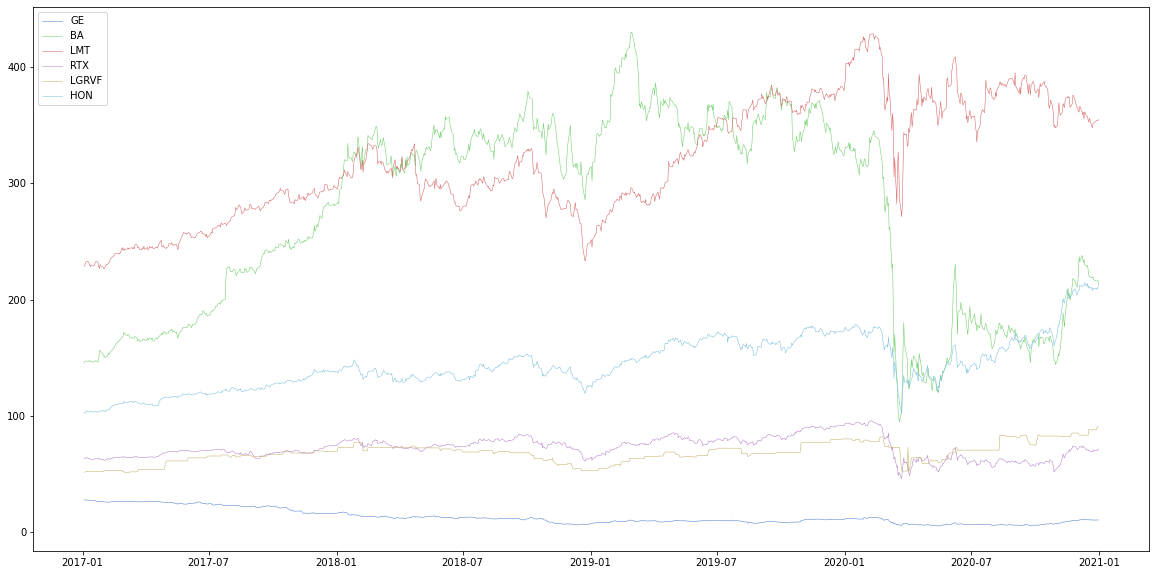

In [116]:
# Plotting Historical Closing price for GE and its primary competitors
def plotStocks(stocks):
    """Stock plotting function. The portfolio is drawn thicker"""
    lw = 0.5
    names = stocks.columns.values
    plt.figure(figsize=(20,10))
    for name in names:
        price = stocks[name]
        if name == 'portfolio':
            lw = 4
        else:
            lw = 0.5
        plt.plot(stocks[name],label = name,linewidth = lw)
        
    plt.legend()

closing = stocks['Adj Close']
plotStocks(closing)

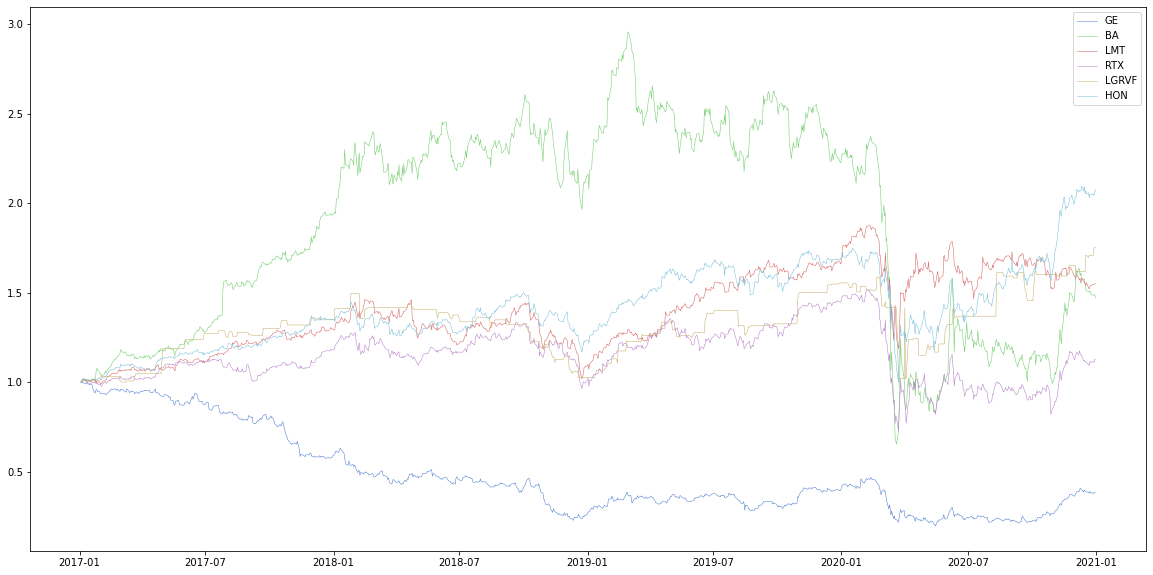

In [117]:
#RELATIVE VALUE ANALYSIS -Instead lets look at the relative change between prices (with all stocks staring at a value of 1).
returns = closing/closing.iloc[0,:]
plotStocks(returns)

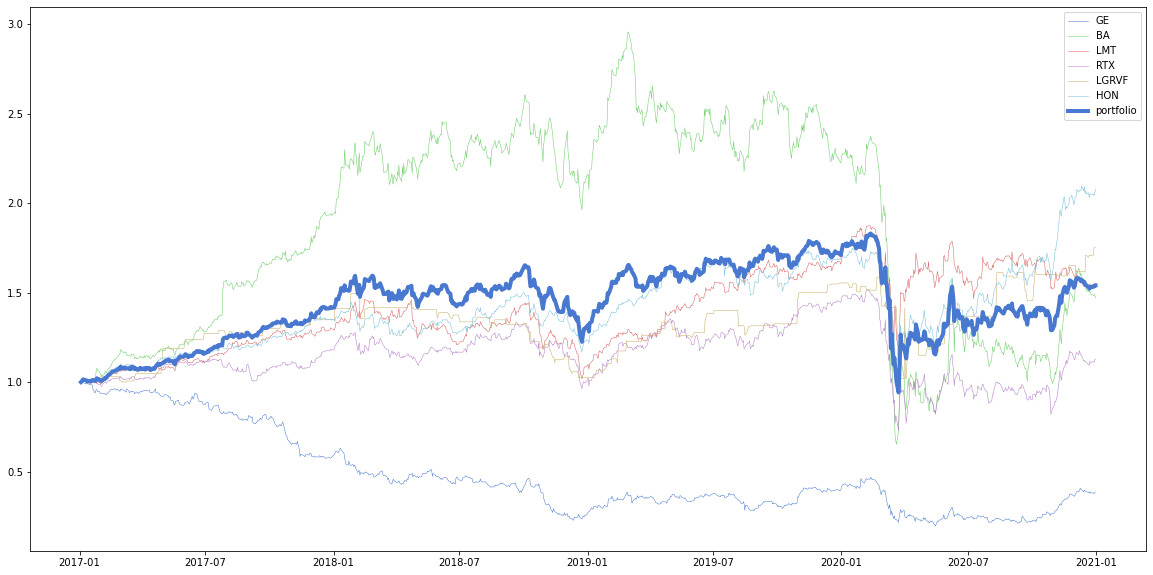

In [118]:
# RELATIVE VALUE ANALYSIS vs Market (Bold Line). See the relative change between prices (with all stocks staring at a value of 1).Suppose we have a portfolio which is the sum of all stocks
# Once again portfolio = portfolio/portfolio[0] (capture relative movement)
portfolio = closing.sum(axis=1)
portfolio = portfolio/portfolio[0]
returns['portfolio'] = portfolio
plotStocks(returns)

In [119]:
today = dt.today().strftime('%Y-%m-%d')
start = dt(2017,1,1).strftime('%Y-%m-%d')
stocks = web.DataReader(['GE','BA','LMT','RTX','LGRVF','HON',],
               data_source='yahoo',
               start=start,
               end=today)

In [120]:
#calculating volatility of stocks and the portfolio
    
def computeVolatility(returns):
    perDailyChange = returns.pct_change() #percentage daily change
    logReturns = np.log(perDailyChange+1)
    volatility = logReturns.std()*np.sqrt(252)
    return volatility

computeVolatility(returns)
#So buying all stocks results in a portfolio lowers the  volatitlity making for a safer investment.

Symbols
GE           0.437784
BA           0.496454
LMT          0.259543
RTX          0.332902
LGRVF        0.367776
HON          0.265943
portfolio    0.261106
dtype: float64

In [121]:
import seaborn as sns

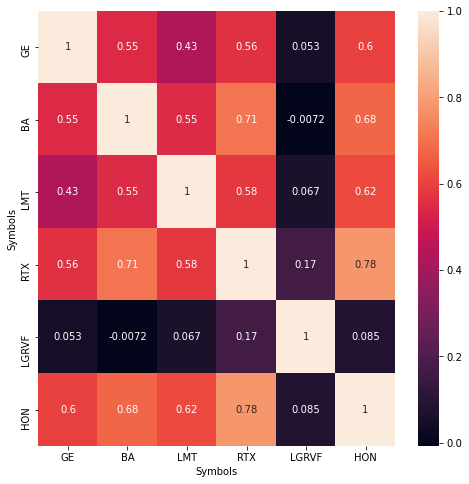

In [122]:
logReturns = np.log(returns.pct_change()+1)
logReturnsCorr = logReturns.iloc[1:,0:-1].corr()
plt.figure(figsize=(8,8))
sns.heatmap(logReturnsCorr,annot=True);

#legrand (LGRVF) has the weakest correlation to the other 5 companies, due to its high variance

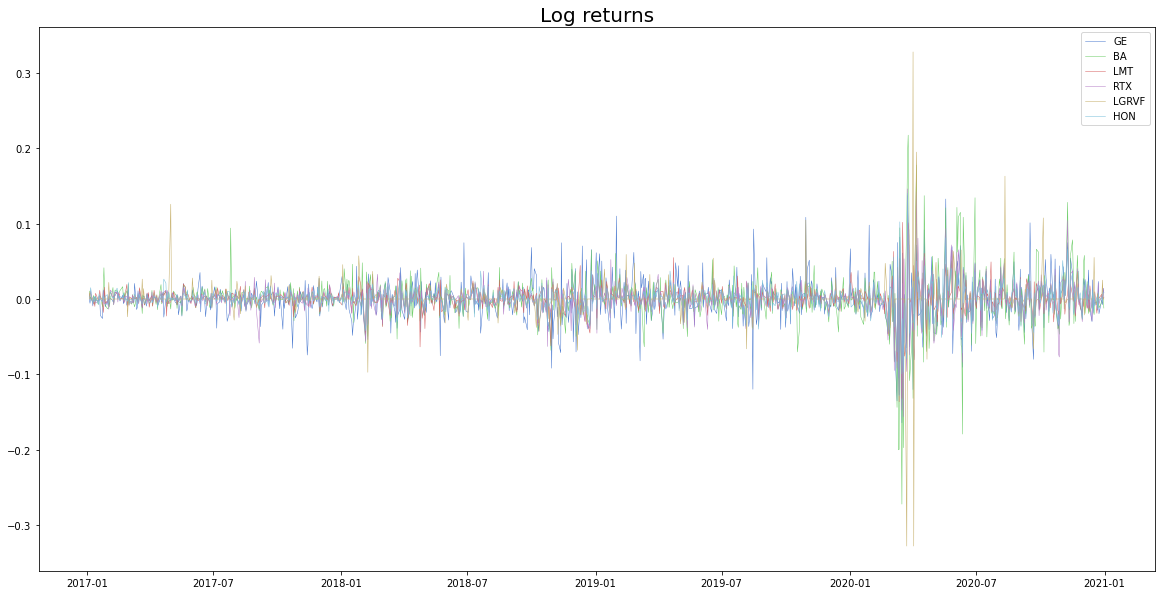

In [123]:
#We can use the bootstrap method to take random samples of all stocks in our portfolio and aggregate
def bootstrap(stockLogReturns,nsims,periods,weights): 
    prfAvgReturn = logReturns.iloc[:,0:-1].dropna()
    prfAvgReturn = (prfAvgReturn*weights).mean(axis=1)
    bootstrap = np.empty(shape = (periods,nsims))
    for i in range(nsims):
        samp = np.random.choice(prfAvgReturn,periods)
        bootstrap[:,i] = samp

    bootstrap = 1+(pd.DataFrame(bootstrap).shift(1).fillna(0))
    return bootstrap.cumprod(axis=0)
    
#portfolio
stockLogReturns = logReturns.iloc[1:,0:-1]
plotStocks(stockLogReturns)
plt.title('Log returns',fontsize=20);

In [124]:
#Instead of simply buying all stocks, suppose we only choose to buy certain quantities of each
# let theese be weight which sum to 1

num_stocks = returns.shape[1]-1
nfolios = 10000
performance = np.empty(shape=(nfolios,3))
weights = np.empty(shape = (nfolios,num_stocks))
for f in range(nfolios):
    w = np.random.uniform(size=num_stocks)
    w = w/w.sum()
    portfolio = (returns.iloc[:,0:-1]*w).sum(axis=1)
    portfolioLogReturn = np.log(portfolio.pct_change()+1)
    volatility = portfolioLogReturn.std()*np.sqrt(252)
    annualizedReturn = (portfolioLogReturn.mean()+1)**252 - 1
    sharpe = annualizedReturn/volatility
    entry = np.array([annualizedReturn,volatility,sharpe])
    #store metrics
    performance[f,:] = entry
    #store weights
    weights[f,:] = w

In [44]:
performance[0:10,:]

array([[0.07890122, 0.25975955, 0.30374712],
       [0.06813875, 0.31081223, 0.21922802],
       [0.01177325, 0.29424155, 0.04001219],
       [0.09467697, 0.26941591, 0.35141566],
       [0.04788561, 0.29792254, 0.16073174],
       [0.10846034, 0.28699134, 0.37792199],
       [0.11905736, 0.23501172, 0.50660179],
       [0.0930856 , 0.27767584, 0.33523117],
       [0.06589112, 0.22609924, 0.29142564],
       [0.06729793, 0.24719953, 0.27224133]])

In [127]:
portfolios = pd.DataFrame(performance,columns=['Return','Risk','Sharpe'])
maxsharpe = np.where(portfolios.Sharpe == portfolios.Sharpe.max())

# maximum sharpe ratio portfolio
best = portfolios.iloc[maxsharpe[0][0],:]
optimalWeights = weights[maxsharpe[0][0],:]

print('best portfolio: \n',best,'\n')
print('optimal weights \n',optimalWeights)

best portfolio: 
 Return    0.160443
Risk      0.214470
Sharpe    0.748092
Name: 9625, dtype: float64 

optimal weights 
 [0.02197685 0.00416432 0.14825021 0.04294878 0.32997021 0.45268964]


In finance, the efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return.

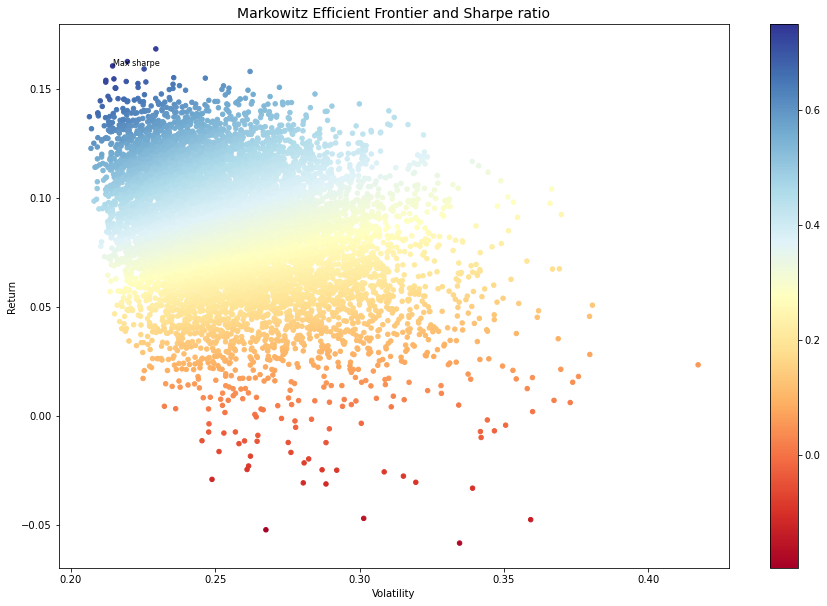

In [128]:
plt.figure(figsize=(15,10))
plt.scatter(x=portfolios.Risk,y=portfolios.Return,
            c=portfolios.Sharpe,s=20,alpha=1,
            cmap='RdYlBu')
plt.colorbar()
plt.title('Markowitz Efficient Frontier and Sharpe ratio',fontsize=14)
plt.annotate('Max sharpe',(best.Risk,best.Return),fontsize=8)
plt.xlabel('Volatility')
plt.ylabel('Return');

In finance, the Sharpe ratio (or reward-to-variability ratio) measures the performance of an investment (e.g., a security or portfolio) compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return divided by the standard deviation of the investment (i.e., its volatility). It represents the additional amount of return that an investor receives per unit of increase in risk.

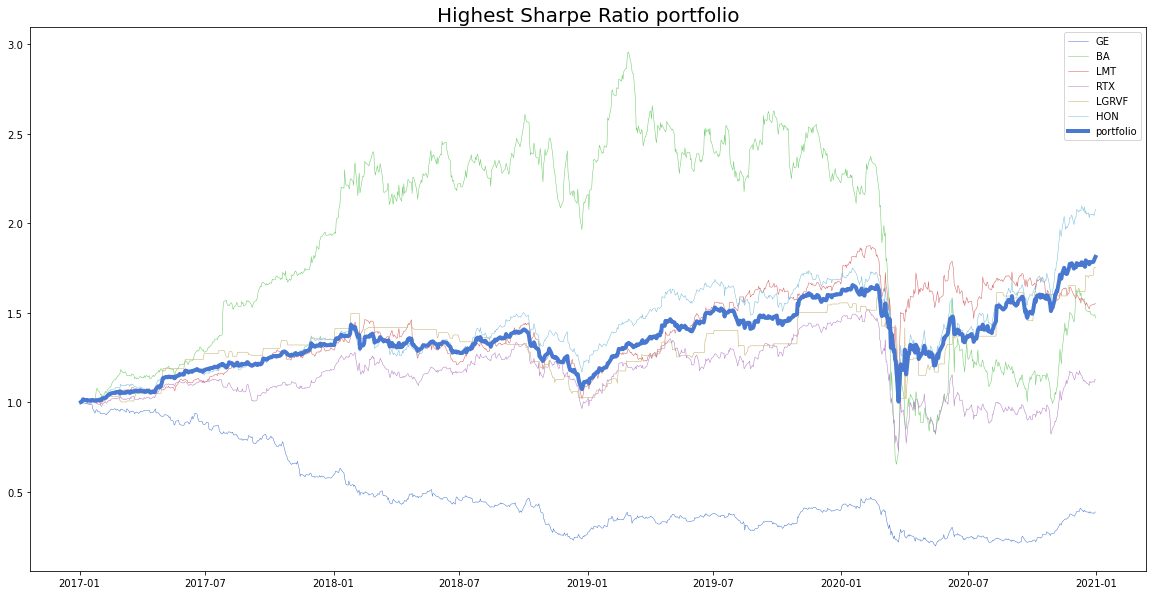

In [129]:
bestPortfolio = (returns.iloc[:,0:-1]*optimalWeights).sum(axis=1)
returns['portfolio'] = bestPortfolio/bestPortfolio[0]
plotStocks(returns)
plt.title('Highest Sharpe Ratio portfolio',fontsize=20);

In [131]:
lowess = sm.nonparametric.lowess(exog=stockWeights.GE,endog=portfolios.Sharpe)
weights.shape
returns.iloc[:,0:-1].columns.values
stockWeights = pd.DataFrame(weights,columns = 
                           returns.iloc[:,0:-1].columns.values)

plt.figure(figsize=(20,10))
plt.scatter(x=stockWeights.TSLA,y=portfolios.Sharpe,alpha=0.1,color='blue')
plt.plot(lowess[:,0],lowess[:,1],color='lime',linewidth=3)
plt.xlabel('Weight');
plt.ylabel('Sharpe');
plt.title('GE Sharpe ratio vs Weight',fontsize=18)

#We can also plot Sharpe ratio against weight of GE stock.

NameError: name 'stockWeights' is not defined

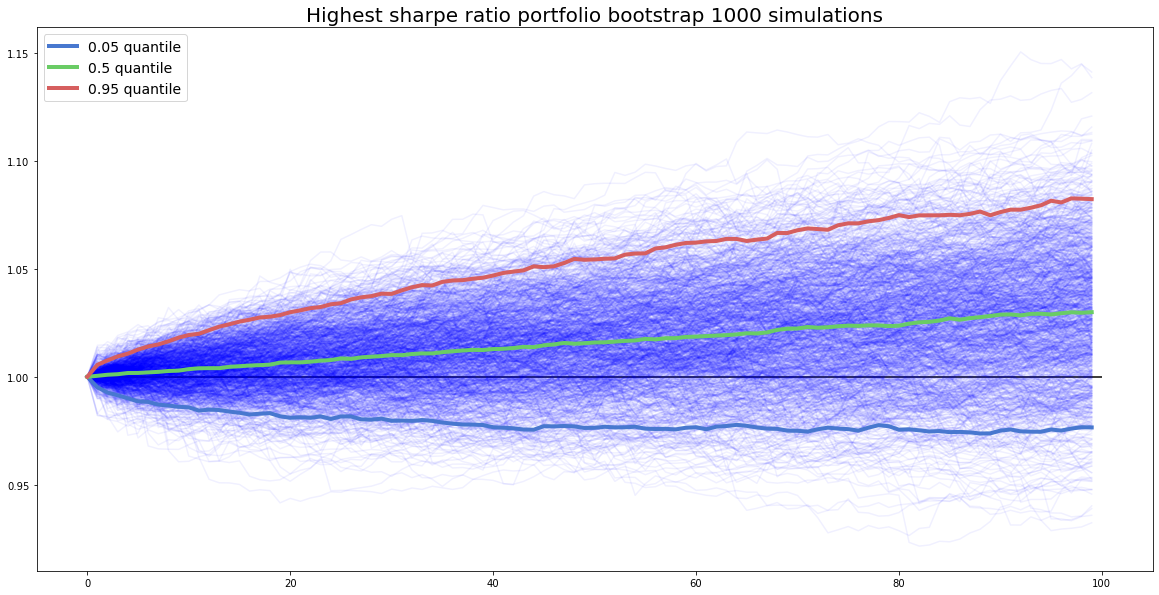

In [16]:
bs = bootstrap(stockLogReturns,1000,100,weights=optimalWeights)
qs = [0.05,0.5,0.95]
quantiles = bs.quantile(qs,axis=1)

plt.figure(figsize=(20,10))
plt.plot(bs,color = 'blue',alpha=0.06);
for q in range(3):
    plt.plot(quantiles.iloc[q,:],label=str(qs[q])+' quantile',linewidth=4);
plt.legend(fontsize = 14)
plt.title('Highest sharpe ratio portfolio bootstrap 1000 simulations',fontsize=20);
plt.hlines(1,0,100);